In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('Mall_Customers.csv')
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


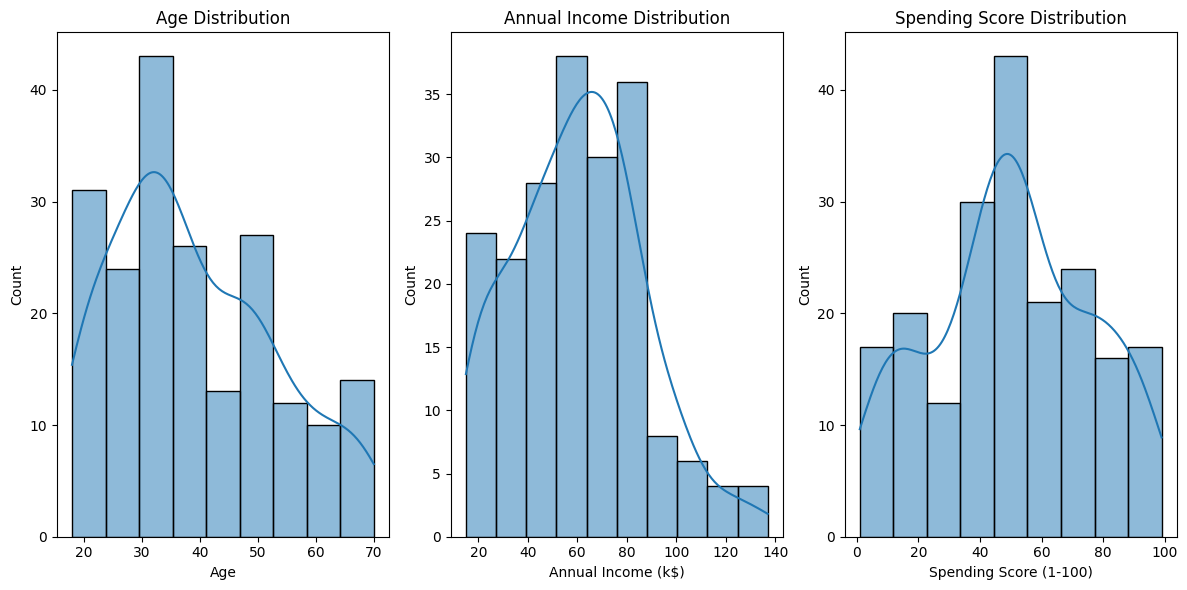

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], kde=True)
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], kde=True)
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


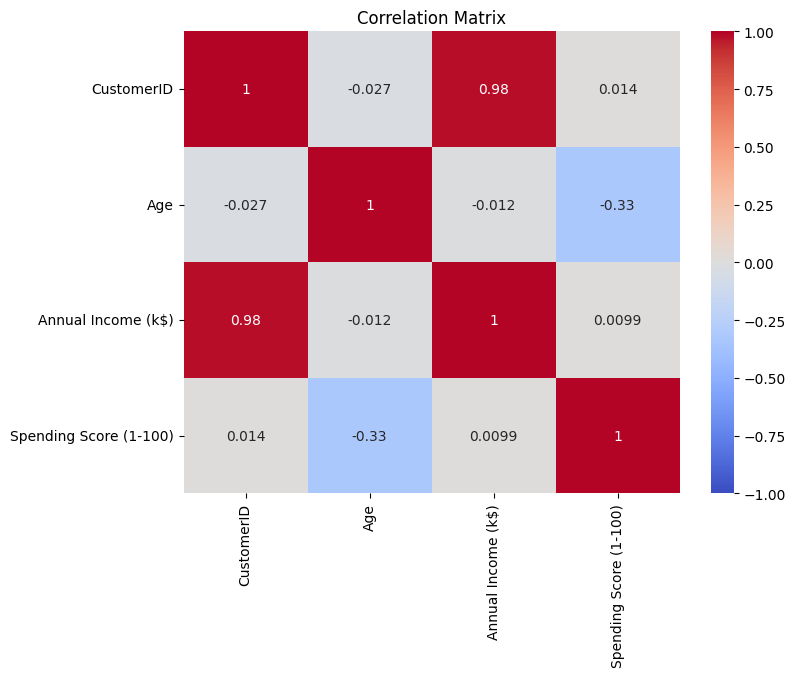

In [ ]:
correlation_matrix = data.drop('Gender', axis=1).corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

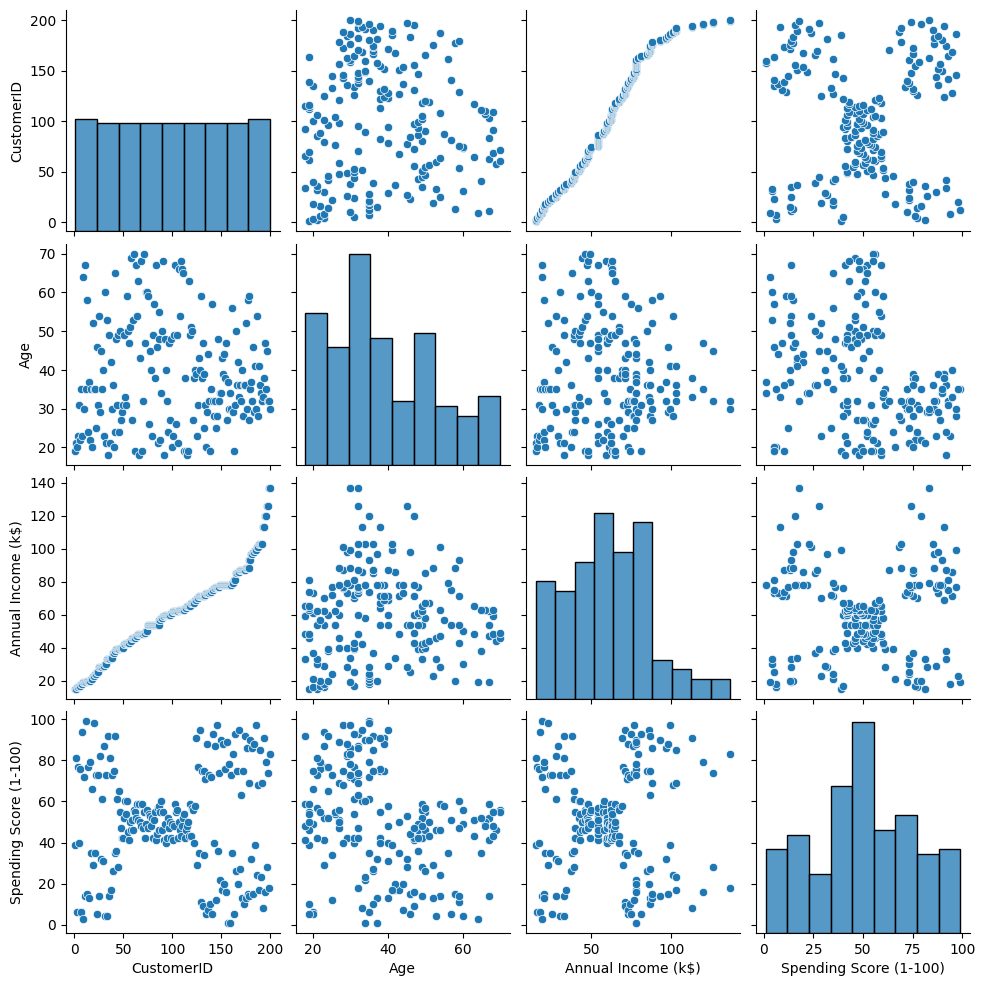

In [ ]:
sns.pairplot(data)
plt.show()

        CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                                   
Female   97.562500  38.098214           59.250000               51.526786
Male    104.238636  39.806818           62.227273               48.511364


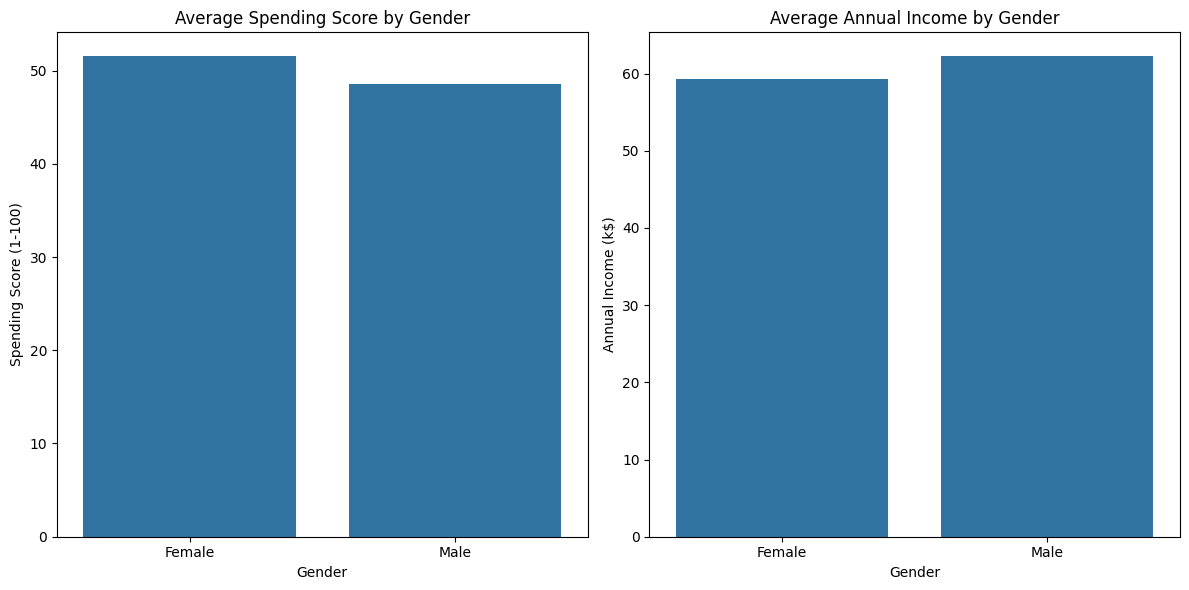

In [ ]:
gender_groups = data.groupby('Gender').mean()
print(gender_groups)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=gender_groups.index, y=gender_groups['Spending Score (1-100)'])
plt.title('Average Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')

plt.subplot(1, 2, 2)
sns.barplot(x=gender_groups.index, y=gender_groups['Annual Income (k$)'])
plt.title('Average Annual Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')

plt.tight_layout()
plt.show()

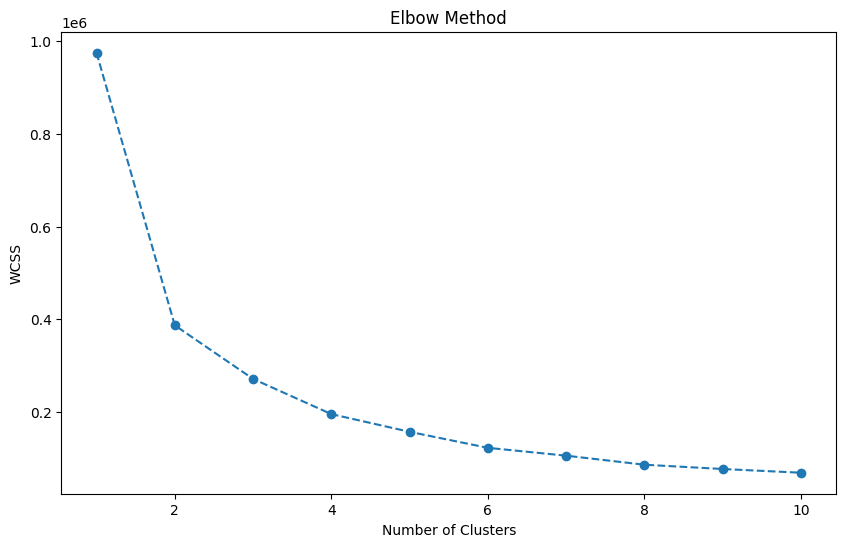

In [ ]:
data = pd.read_csv('Mall_Customers.csv')

# Drop the 'Gender' column
data_for_clustering = data.drop(columns=['Gender'])

wcss = []
max_clusters = 10
for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_for_clustering)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters+1), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

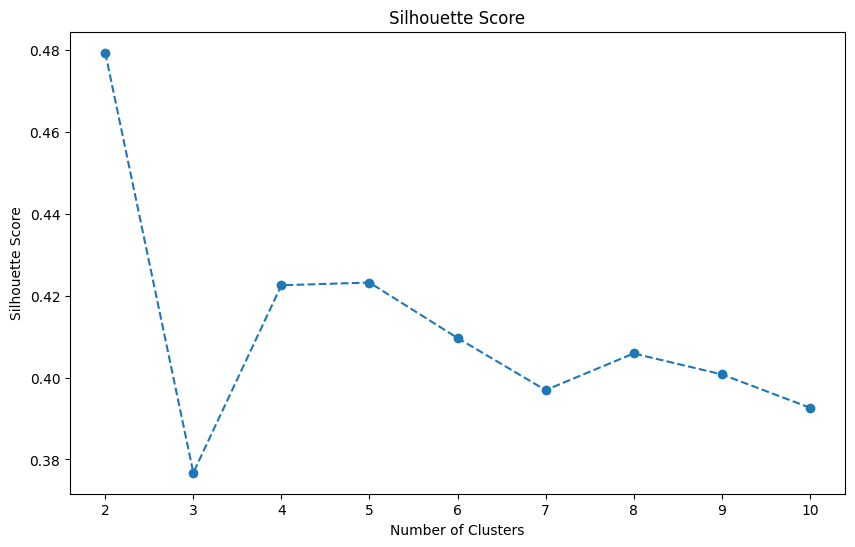

In [ ]:
sil_scores = []
for i in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_for_clustering)
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(data_for_clustering, labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters+1), sil_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

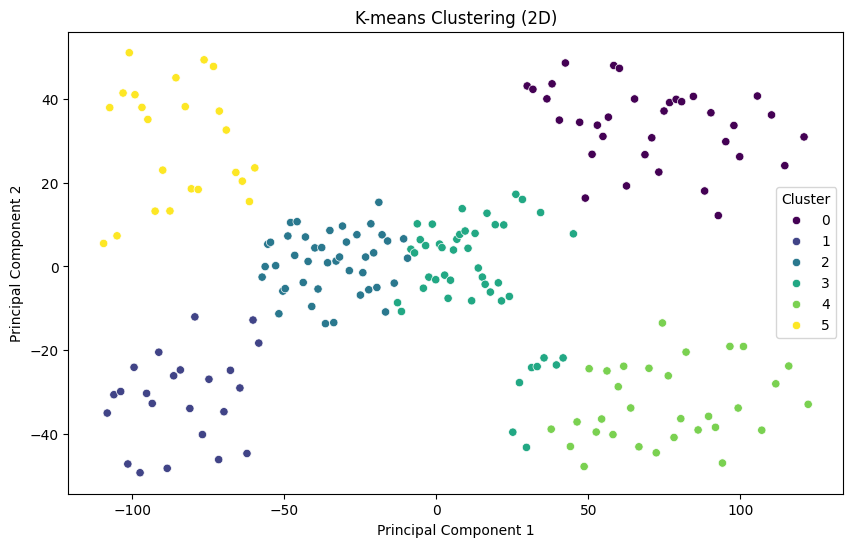

In [ ]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_for_clustering)
cluster_labels = kmeans.labels_

# Visualize the clusters in 2D using PCA for dimensionality reduction
pca = PCA(n_components = 2, random_state = 42)
data_2d = pca.fit_transform(data_for_clustering)

# Create a DataFrame with the reduced data and cluster labels
clustered_data_2d = pd.DataFrame({'PC1': data_2d[:, 0], 'PC2': data_2d[:, 1], 'Cluster': cluster_labels})

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clustered_data_2d, x='PC1', y='PC2', hue='Cluster', palette='viridis', legend='full')
plt.title('K-means Clustering (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()